In [2]:
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import random
import seaborn as sns

In [3]:
# Import tables

# These are for Piton de la Fournaise
#eruptions = pd.read_csv("eruptions_reunion.csv")
#average_rain = pd.read_csv("average_reunion.csv")

# These are all for the Galapagos
eruptions = pd.read_csv("eruptions_galapagos.csv")
#climate_bellavista = pd.read_csv("climate_bellavista.csv")
#average_rain = climate_bellavista[['observation_date', 'precipitation']]
climate_ayora = pd.read_csv("climate_puerto-ayora.csv")
average_ayora = climate_ayora[['observation_date', 'precipitation']]

# This is the ONI water surface temperature for El Nino
oni = pd.read_csv("oni.csv")

In [4]:
def date_to_decimal_year(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    day_of_year = date_obj.timetuple().tm_yday
    decimal_year = year + (day_of_year - 1) / 365.0
    decimal_year = round(decimal_year,4) 
    return decimal_year

In [8]:
# Converts date information from ONI into numerical format

date_converter = {'DJF': ('12', '03', '01'), 'JFM': ('01', '04', '02'), 'FMA': ('02', '05', '03'), 'MAM': ('03', '06', '04'), 'AMJ': ('04', '07', '05'), 'MJJ': ('05', '08', '06'), 'JJA': ('06', '09', '07'), 'JAS': ('07', '10', '08'), 'ASO': ('08', '11', '09'), 'SON': ('09', '12', '10'), 'OND': ('10', '01', '11'), 'NDJ': ('11', '02', '12')}

def convert_start(row):
    if row['SEAS'] == 'DJF':
        return str(row['YR']-1) + '-' + date_converter[row['SEAS']][0] + '-01'
    else:
        return str(row['YR']) + '-' + date_converter[row['SEAS']][0] + '-01' 

def convert_end(row):
    if row['SEAS'] == 'NDJ':
        return str(row['YR']+1) + '-' + date_converter[row['SEAS']][1] + '-01'
    else: 
        return str(row['YR']) + '-' + date_converter[row['SEAS']][1] + '-01' 

def convert_mid(row):
    return str(row['YR']) + '-' + date_converter[row['SEAS']][2] + '-15' 

oni['Start'] = oni.apply(convert_start, axis=1)
oni['End'] = oni.apply(convert_end, axis=1)
oni['Center'] = oni.apply(convert_mid, axis=1)

In [24]:
el_nino = oni[oni['ANOM'] >= .5]

In [31]:
non_nino_eruptions = pd.DataFrame()
for i in eruptions.iterrows():
    add = True
    for j in el_nino.iterrows():
        if i[1][1] >= j[1][4] and i[1][1] < j[1][5]:
            add = False
            break
    if add == True:
        non_nino_eruptions = non_nino_eruptions.append(i[1], ignore_index= True)



/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_31262/2819683953.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_nino_eruptions = non_nino_eruptions.append(i[1], ignore_index= True)
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_31262/2819683953.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_nino_eruptions = non_nino_eruptions.append(i[1], ignore_index= True)
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_31262/2819683953.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_nino_eruptions = non_nino_eruptions.append(i[1], ignore_index= True)
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_31262/2819683953.py:9: FutureWarning: The frame.append method is deprec

In [32]:
print(non_nino_eruptions)

          Volcano       Start         End  Max Explosivity
0   Negra, Sierra  2005-10-22  2005-10-30                3
1   Negra, Sierra  2018-06-26  2018-08-23                2
2   Negra, Sierra  1963-04-13  1963-05-16                2
3     Azul, Cerro  2008-05-29  2008-06-17                1
4     Azul, Cerro  1979-01-29  1979-03-04                2
5     Azul, Cerro  1998-09-15  1998-10-21                1
6      Fernandina  1961-03-21  1961-09-16                2
7      Fernandina  1968-05-21  1968-05-23                2
8      Fernandina  1973-12-09  1973-12-16                2
9      Fernandina  1978-08-08  1978-08-26                2
10     Fernandina  1981-08-01        None                0
11     Fernandina  1984-03-30        None                1
12     Fernandina  1988-09-14  1988-09-16                2
13     Fernandina  1991-04-19  1991-04-24                2
14     Fernandina  2005-05-13  2005-05-29                2
15     Fernandina  2009-04-10  2009-04-28               

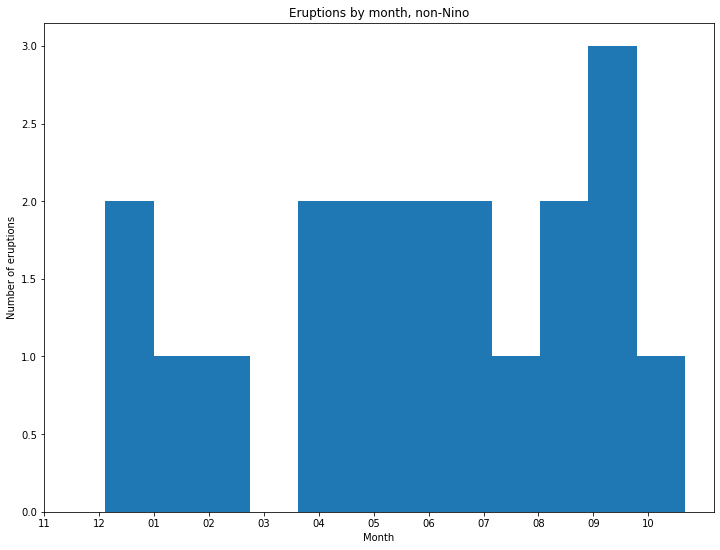

In [37]:
# Breaks up rain by month
erupt_dates = non_nino_eruptions['Start'][non_nino_eruptions['Start'] >= '1965']
decimal_erupts = np.array(erupt_dates.apply(date_to_decimal_year))
x = [((i + (2/12)) % 1) for i in decimal_erupts]
plt.figure(figsize=(12,9))

plt.hist(x, bins=12)
plt.xticks([(1/12)*k for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
plt.xlabel("Month") 
plt.ylabel("Number of eruptions") 
plt.title('Eruptions by month, non-Nino') 
plt.show() 